### compile(), fit() 메소드를 사용해서 쉽게 인공신경망 구축하기

위의 예제에서는 SGD를 직접 구현해서 최적화 알고리즘을 구성했다.

Keras API에서 제공하는 여러 메소드를 사용하면, 이러한 최적화 알고리즘을 직접 구성할 필요가 없다.
( Adam, RMSprop, SGD, Momentum ... 언제 구현하노.. )

In [ ]:
# keras로 선형회귀 모델 구현

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

tf.random.set_seed(1)

# 클래스를 통해서 인공신경망 구축
# tf.keras.Model 에는 여러 Neural Network의 기본적인 기능이 구현되어 있다.
# 여러 모델 아키텍쳐와 레이어를 쉽게 구축할 수 있다.
# fit(), evaluate(), predict() 등의 메소드를 제공한다.
class LinearRegression(tf.keras.Model): 

    def __init__(self): # initialize model parameters
        super(LinearRegression, self).__init__()
    
        # Dense Layer : Fully-Connected Layer를 설정한다. 즉, 하나의 레이어를 생성한다.
        # fully-connected layer ( thus, dense layer ) 는 입력과 출력 사이의 모든 뉴런이 서로 연결되어 있다.
        # 이는 Weight matrix와 Bias vector를 통해서 선형결합 및 활성화 함수를 통과시킨다.
        # units : 출력 뉴런의 수 ( 1개 레이블 ), input_shape : 입력 뉴런의 수 ( 1개 특성 )
        # activation : 활성화 함수 ( default : None ) 또한 설정 할 수 있다.
        self.dense = tf.keras.layers.Dense(units=1, input_shape=(1,))

        
    # Neural Network의 Forward Pass를 정의 
    # 인스턴스를 호출할 때 입력값을 자동으로 전달한다.
    def call(self, x):
        return self.dense(x)
    

# 콜백 클래스 정의 : 훈련 과정 중간에 호출되는 함수를 이용해서 훈련 과정의 손실함수를 모니터링 할 수 있다.
# 메소드 오버라이딩을 통해서, 추적하고자 하는 정보를 커스텀할 수 있다.
# attribute of keras.callbacks.Callback : model = Reference of the model being trained, params = Dict. parameters
class LossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self): # 훈련 시작시 정보저장용 리스트 호출
        self.losses = []
        
    def on_batch_end(self, logs): # 각 배치마다 손실함수 값 저장
        self.losses.append(logs.get('loss'))

class weightHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self):
        self.weights = []
        self.bias = []
        
    def on_batch_end(self): # 각 배치마다 가중치와 편향 저장
        w, b = self.model.get_weights() # model.get_weights() : 모델의 가중치를 반환한다.
        self.weights.append(w[0])
        self.bias.append(b[0])




# 데이터 생성
X_train = np.arange(10).reshape((10, 1)) # create column vector
Y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0])

# 특성 표준화 : ( X_train - 평균 ) / 표준편차  ( 평균 0, 표준편차 1 )
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)


# MSE 손실함수
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))


# 모델 인스턴스 생성 : 파라미터 정보 및 forward pass를 가지고 있다.
model1 = LinearRegression()


# 앞선 커스텀 콜백의 인스턴스를 생성한다.
loss_history = LossHistory()
weight_history = weightHistory()

# 모델 컴파일 : 손실함수 및 최적화 알고리즘 설정
# metrics는 최적화 과정에 영향을 주지 않는다. : 모델 성능을 평가하기 위한 지표
# metrics=['mae', 'mse'] : 평균 절대 오차, 평균 제곱 오차
model1.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss=loss_fn, metrics=['mae', 'mse'])

# 모델 훈련 : 학습 데이터셋을 이용하여 모델을 학습한다.
# epochs : 에포크 수, batch_size : 배치 사이즈
# verbose : 학습중 관련 정보 출력 여부 (0 : 출력 안함, 1 : 출력함)
model1.fit(X_train_norm, Y_train, epochs=100, batch_size=1 , verbose=1, callbacks=[loss_history, weight_history])




Epoch 1/100


/home/minseok/miniconda3/envs/minseok/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 28.2085 - mae: 4.2025 - mse: 28.2085
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.9076 - mae: 3.4569 - mse: 18.9076
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.7158 - mae: 2.8523 - mse: 12.7158
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.5913 - mae: 2.3700 - mse: 8.5913 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.8420 - mae: 1.9826 - mse: 5.8420 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.0078 - mae: 1.6668 - mse: 4.0078
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.7827 - mae: 1.4095 - mse: 2.7827
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9633 - mae: 1.1998 - mse: 1.9633  
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4145 - mae: 1.0428 - mse: 1.4145 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0462 - mae: 0.9159 - mse: 1.0462 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - los

W = [[2.7240849]], b = [4.9556704]


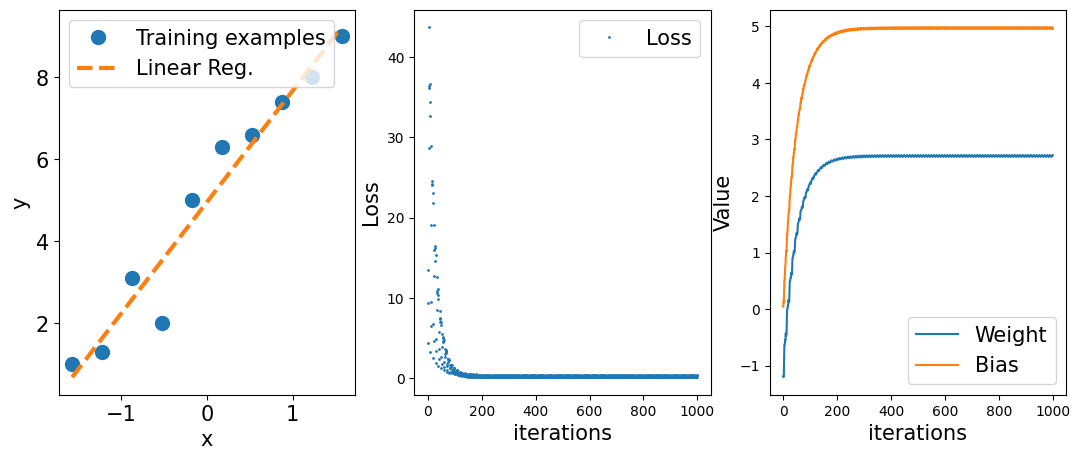

In [12]:
# 최종 학습 결과 출력

W,b = model1.get_weights() # 학습된 가중치와 편향 출력
print(f'W = {W}, b = {b}')

# 시각화 및 결과 출력

X_test = np.linspace(0, 9, num=100).reshape(-1, 1) # 테스트 데이터 생성 : -1~1 사이의 100개의 데이터 생성
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train) # 테스트 데이터 표준화

Y_pred = model1(tf.cast(X_test_norm, dtype=tf.float32)) # 예측값 생성 : 모델에 테스트 데이터를 넣어 예측 회귀선 생성

fig = plt.figure(figsize=(13, 5))

# 1행 2열의 그래프 생성, 1번 그래프 : 훈련 데이터와 예측 회귀선
ax = fig.add_subplot(1, 3, 1)
plt.plot(X_train_norm, Y_train, 'o', markersize=10) # 훈련 데이터
plt.plot(X_test_norm, Y_pred, '--', lw=3) # 예측 회귀선
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
plt.xlabel('x', size=15)
plt.ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

# 1행 2열의 그래프 생성, 2번 그래프 : 손실함수 그래프
ax = fig.add_subplot(1, 3, 2)
plt.plot(loss_history.losses,'o', markersize=1, label='Loss', )
plt.legend(fontsize=15)
plt.xlabel('iterations', size=15)
plt.ylabel('Loss', size=15)

# 가중치 및 편향 변화 그래프
ax = fig.add_subplot(1, 3, 3)
plt.plot(weight_history.weights, label='Weight')
plt.plot(weight_history.bias, label='Bias')
plt.legend(fontsize=15)
plt.xlabel('iterations', size=15)
plt.ylabel('Value', size=15)


plt.show()

### keras.Sequential을 이용해서 MLP 구현하기 ( with activation function )

다층 퍼셉트론에서 여러 hidden layer를 기존 방식으로 쌓으면 내 모델 클래스의 레이어와 forward pass 가 난잡해진다.

이를 해결하기위해서, 고수준의 Sequential 메소드를 이용하면, 가독성 있게 다층퍼셉트론을 관리할 수 있다.

In [1]:
# iris 데이터셋을 이용한 다중 클래스 분류 모델 구현

import tensorflow_datasets as tfds
print(len(tfds.list_builders())) # 사용가능한 데이터셋의 개수 출력

2025-01-31 22:10:10.475402: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-31 22:10:10.480411: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-31 22:10:10.496960: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738329010.526679   36189 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738329010.532812   36189 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-31 22:10:10.557008: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

1296
